In [32]:
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/drive')

path = "/content/CleanedCoronary.csv"

df=pd.read_csv(path)

df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,totChol_1,...,newGlucose_1,totChol,cigsPerDay,BMI,heartRate,education,BPMeds,glucose,newGlucose,selectedCase
4233,1,68,1,0,0,0,122.0,70.0,0,261.0,...,60.0,261,10,26.37,96,1,0,60.0,60,1
4234,1,68,1,0,0,0,145.0,67.0,1,193.0,...,72.0,193,15,23.13,75,1,0,72.0,72,1
4235,1,69,1,0,0,0,123.0,77.0,1,245.0,...,81.0,245,1,26.58,70,1,0,81.0,81,1
4236,1,69,1,0,1,0,151.0,74.0,0,232.0,...,62.0,232,4,24.14,75,1,0,62.0,62,1
4237,1,69,1,0,1,0,179.0,93.0,0,186.0,...,67.0,186,23,26.64,72,,0,67.0,67,0


In [33]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!pip install SQLAlchemy==1.4.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pandasql import sqldf

Cleandf = sqldf("select * from df where selectedCase = 1")

Cleandf.tail()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,totChol_1,...,newGlucose_1,totChol,cigsPerDay,BMI,heartRate,education,BPMeds,glucose,newGlucose,selectedCase
3271,1,68,1,0,0,0,109.0,73.0,0,250.0,...,66.0,250,10,24.68,72,2,0,66.0,66,1
3272,1,68,1,0,0,0,122.0,70.0,0,261.0,...,60.0,261,10,26.37,96,1,0,60.0,60,1
3273,1,68,1,0,0,0,145.0,67.0,1,193.0,...,72.0,193,15,23.13,75,1,0,72.0,72,1
3274,1,69,1,0,0,0,123.0,77.0,1,245.0,...,81.0,245,1,26.58,70,1,0,81.0,81,1
3275,1,69,1,0,1,0,151.0,74.0,0,232.0,...,62.0,232,4,24.14,75,1,0,62.0,62,1


In [36]:
#export excel file 
from sqlalchemy.sql.expression import false
from pickle import FALSE

path = "/content/Cleandf.xlsx"

with pd.ExcelWriter(path) as writer:
  Cleandf.to_excel(writer,sheet_name = 'Cleandata',index = false)

In [37]:
print(Cleandf.isna().sum())

male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
totChol_1            0
cigsPerDay_1         0
BMI_1                0
heartRate_1          0
education_1          0
BPMeds_1             0
newGlucose_1         0
totChol              0
cigsPerDay           0
BMI                  0
heartRate            0
education            0
BPMeds               0
glucose            324
newGlucose           0
selectedCase         0
dtype: int64


In [38]:
Cleandf = Cleandf.drop('totChol', axis=1)
Cleandf = Cleandf.drop('cigsPerDay', axis=1)
Cleandf = Cleandf.drop('BMI', axis=1)
Cleandf = Cleandf.drop('heartRate', axis=1)
Cleandf = Cleandf.drop('BPMeds', axis=1)
Cleandf = Cleandf.drop('glucose', axis=1)
Cleandf = Cleandf.drop('newGlucose', axis=1)
Cleandf = Cleandf.drop('education', axis=1)
Cleandf = Cleandf.drop('selectedCase', axis=1)

print(Cleandf.isna().sum())

male               0
age                0
currentSmoker      0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
TenYearCHD         0
totChol_1          0
cigsPerDay_1       0
BMI_1              0
heartRate_1        0
education_1        0
BPMeds_1           0
newGlucose_1       0
dtype: int64


Text(0.5, 1.0, 'Heatmap After Removing Outliers')

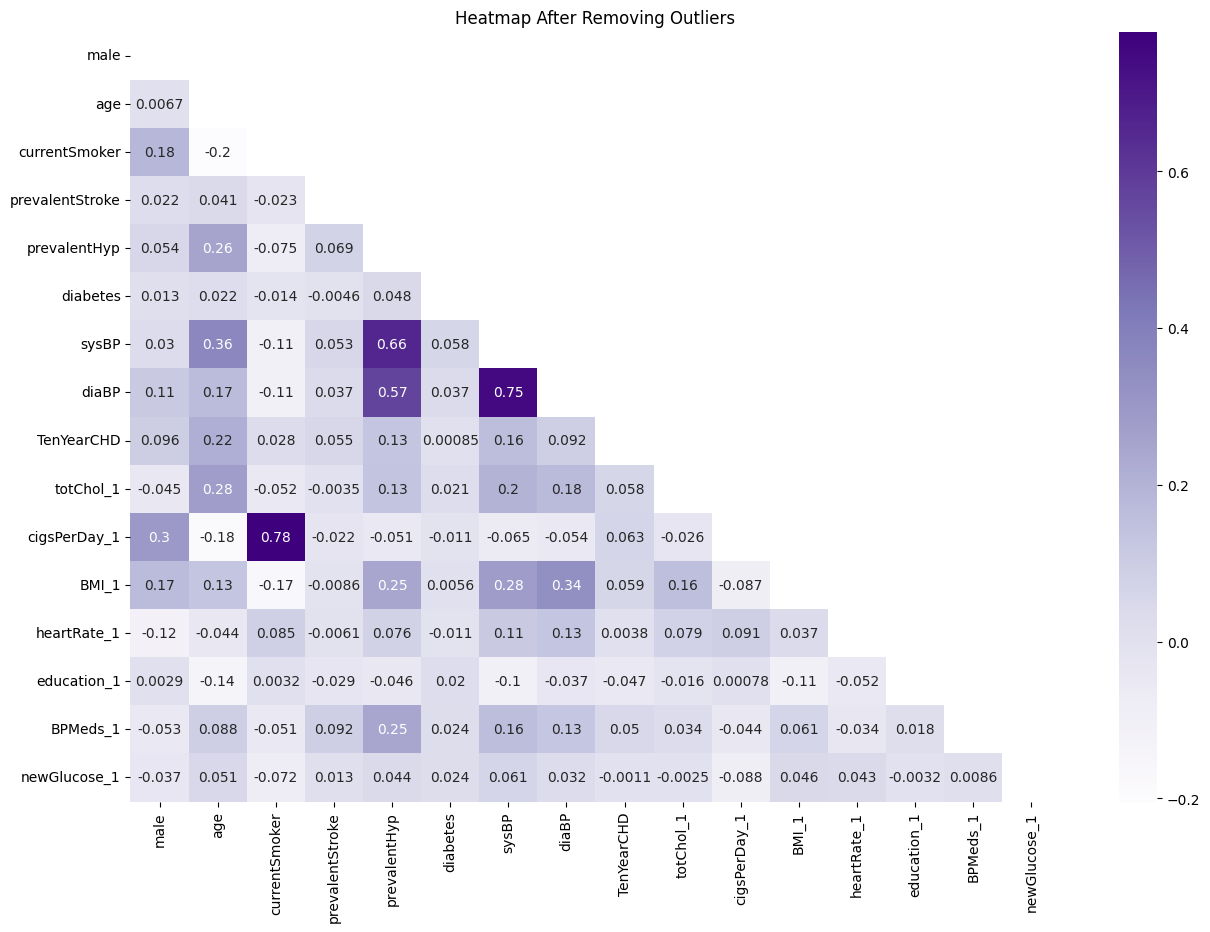

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(Cleandf.corr(), annot=True, cmap='Purples',
            mask=np.triu(Cleandf.corr()), ax=ax).set_title("Heatmap After Removing Outliers")

In [40]:
print(Cleandf.describe())

              male          age  currentSmoker  prevalentStroke  prevalentHyp  \
count  3276.000000  3276.000000    3276.000000      3276.000000   3276.000000   
mean      0.439255    48.828755       0.503053         0.004579      0.235348   
std       0.496372     8.453247       0.500067         0.067522      0.424281   
min       0.000000    32.000000       0.000000         0.000000      0.000000   
25%       0.000000    42.000000       0.000000         0.000000      0.000000   
50%       0.000000    48.000000       1.000000         0.000000      0.000000   
75%       1.000000    55.000000       1.000000         0.000000      0.000000   
max       1.000000    70.000000       1.000000         1.000000      1.000000   

          diabetes        sysBP        diaBP   TenYearCHD    totChol_1  \
count  3276.000000  3276.000000  3276.000000  3276.000000  3276.000000   
mean      0.004579   127.253663    80.720391     0.129121   233.120397   
std       0.067522    16.431028     9.742554    

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'currentSmoker'}>,
        <Axes: title={'center': 'prevalentStroke'}>],
       [<Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'TenYearCHD'}>,
        <Axes: title={'center': 'totChol_1'}>,
        <Axes: title={'center': 'cigsPerDay_1'}>,
        <Axes: title={'center': 'BMI_1'}>],
       [<Axes: title={'center': 'heartRate_1'}>,
        <Axes: title={'center': 'education_1'}>,
        <Axes: title={'center': 'BPMeds_1'}>,
        <Axes: title={'center': 'newGlucose_1'}>]], dtype=object)

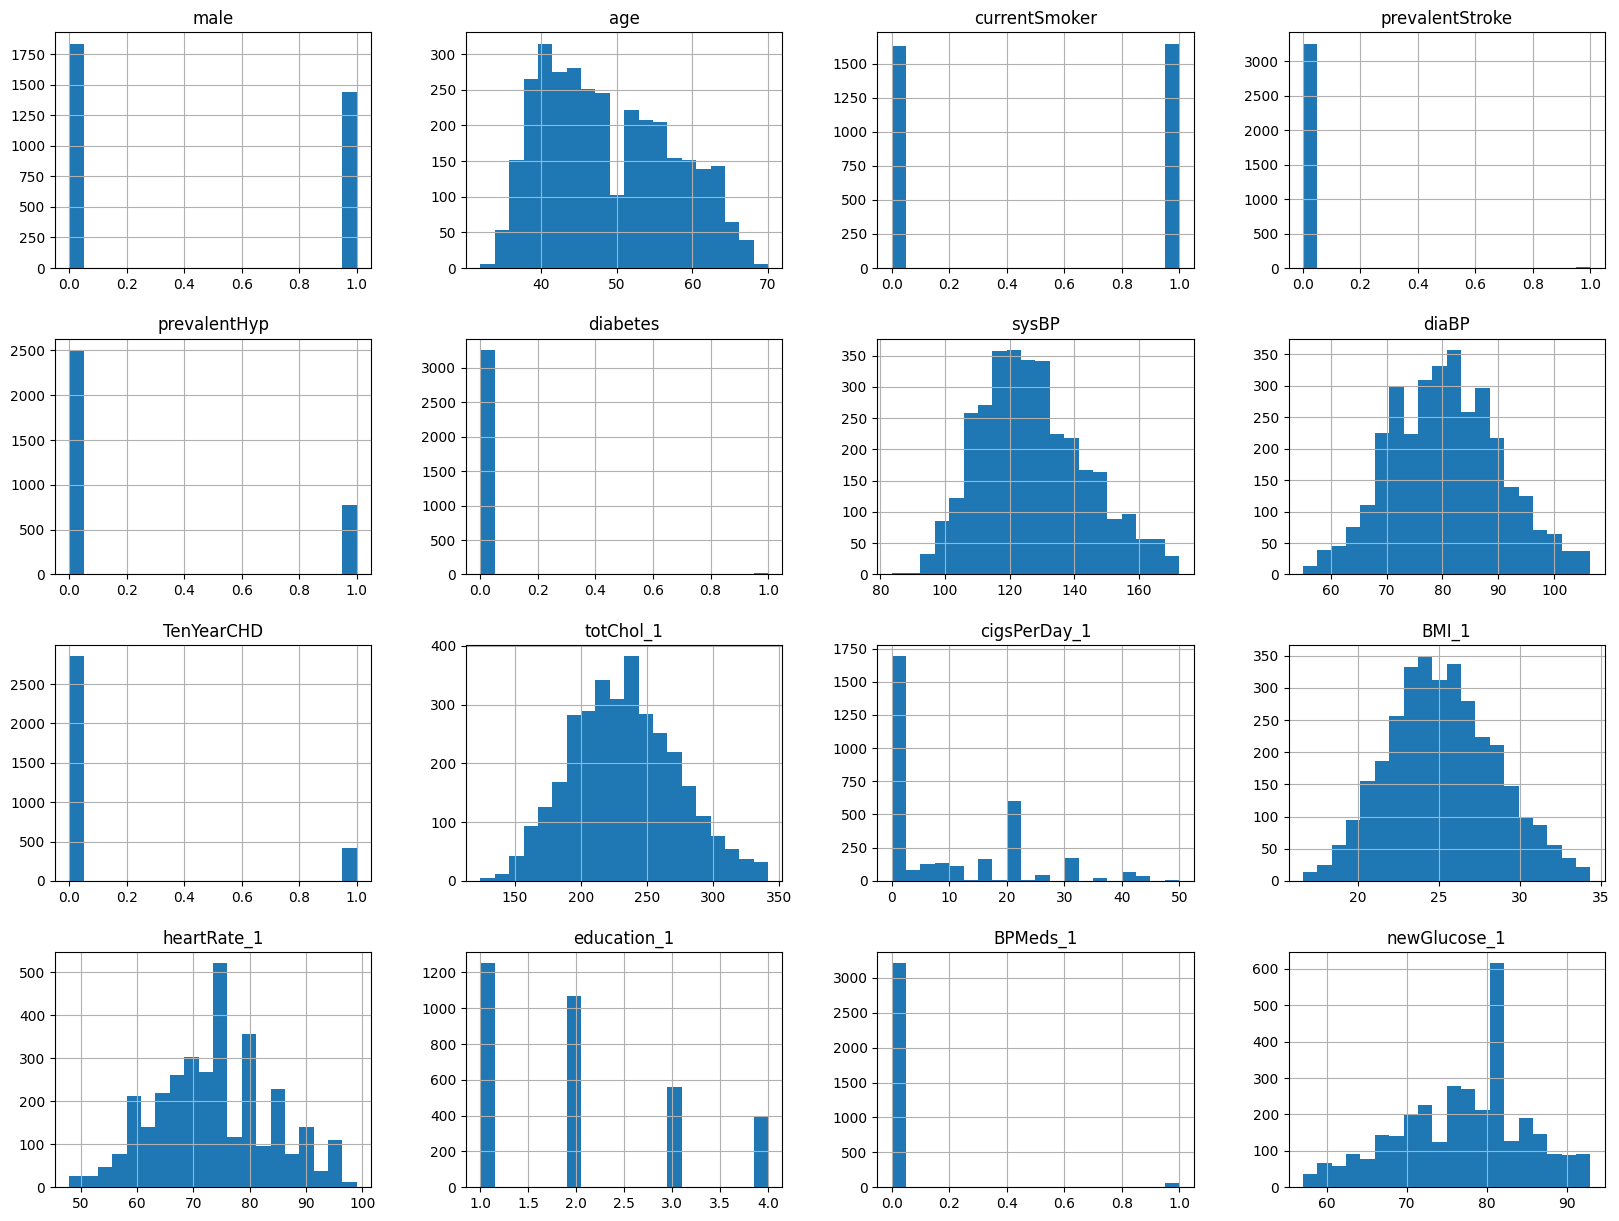

In [41]:
Cleandf.hist(bins=20, figsize=(20,15))

In [42]:
Cleandf['TenYearCHD'].value_counts()/3275

0    0.871145
1    0.129160
Name: TenYearCHD, dtype: float64

Text(0.5, 0, '87% vs 13%')

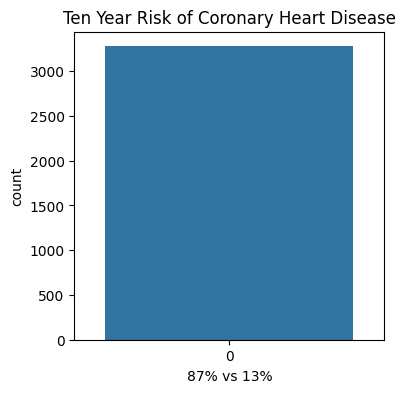

In [43]:
plt.figure(figsize=(4,4))
sns.countplot(Cleandf['TenYearCHD'])
plt.title('Ten Year Risk of Coronary Heart Disease')
plt.xlabel('87% vs 13%')

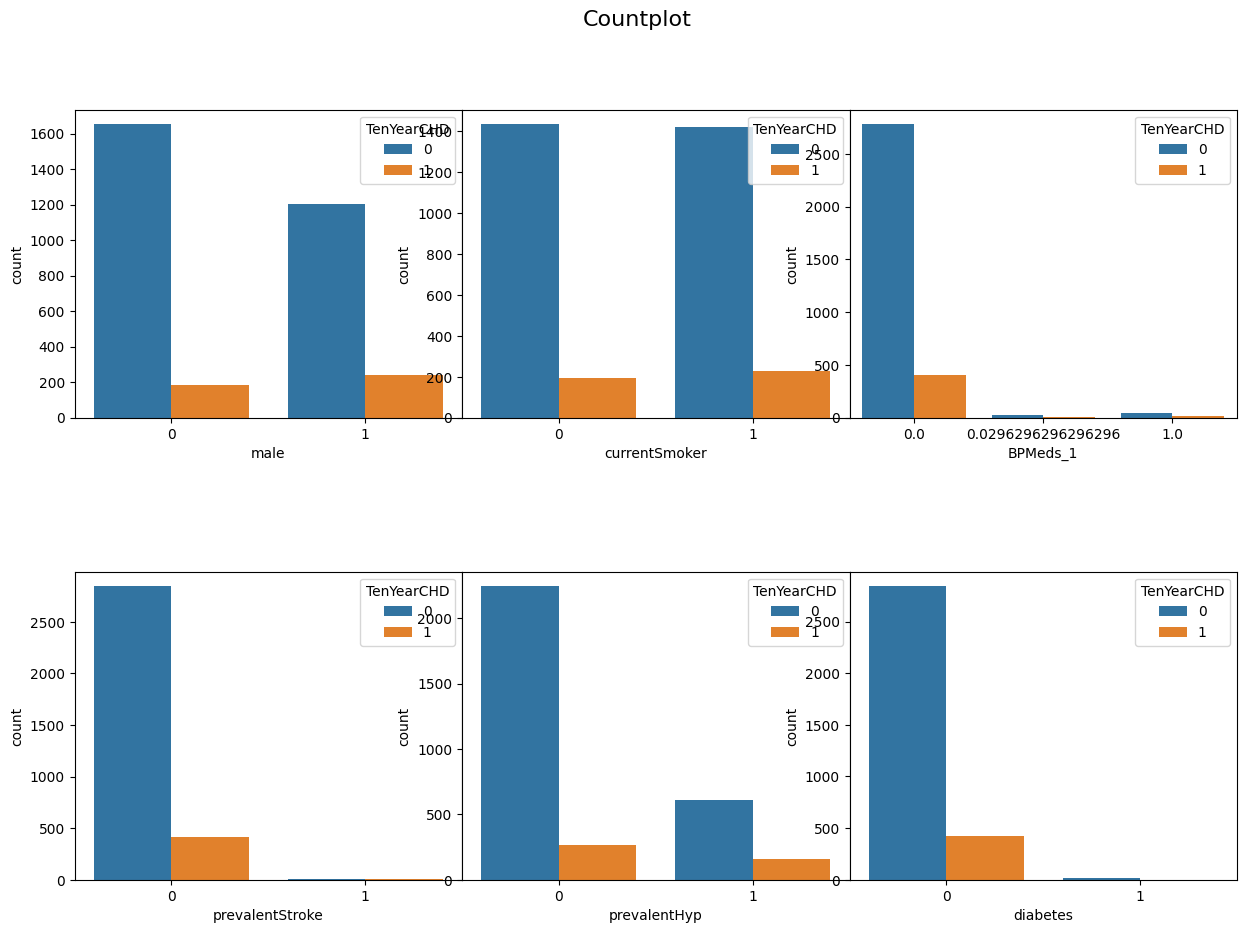

In [44]:
count_col = ['male','currentSmoker','BPMeds_1','prevalentStroke','prevalentHyp','diabetes']

fig, axes = plt.subplots(2,3, figsize=(15,10))
fig.subplots_adjust(hspace=0.5,wspace=0.000001)

fig.suptitle('Countplot',fontsize=16)

i=0
n=0

for x in count_col:
    sns.countplot(x=Cleandf[x],hue=Cleandf['TenYearCHD'],ax=axes[i,n])
    
    if n < 2:
        n+=1
    else:
        n=0
        i+=1
plt.show()

In [45]:
Cleandf_CHD = Cleandf.groupby(['TenYearCHD'])
Cleandf_CHD[count_col].sum()

,male,currentSmoker,BPMeds_1,prevalentStroke,prevalentHyp,diabetes
TenYearCHD,,,,,,
0,1201,1420,45.888889,9,610,13
1,238,228,15.237037,6,161,2


<Axes: xlabel='education_1', ylabel='count'>

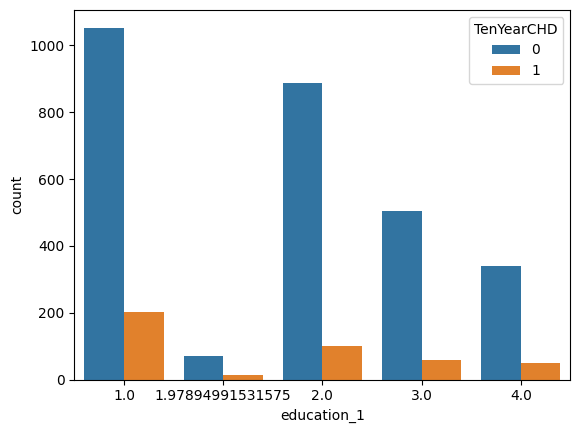

In [46]:
sns.countplot(x=Cleandf['education_1'],hue=Cleandf['TenYearCHD'])

In [47]:
Cleandf_CHD['education_1'].value_counts()

TenYearCHD  education_1
0           1.00000        1053
            2.00000         887
            3.00000         503
            4.00000         340
            1.97895          70
1           1.00000         201
            2.00000         100
            3.00000          58
            4.00000          51
            1.97895          13
Name: education_1, dtype: int64

<Axes: xlabel='age', ylabel='count'>

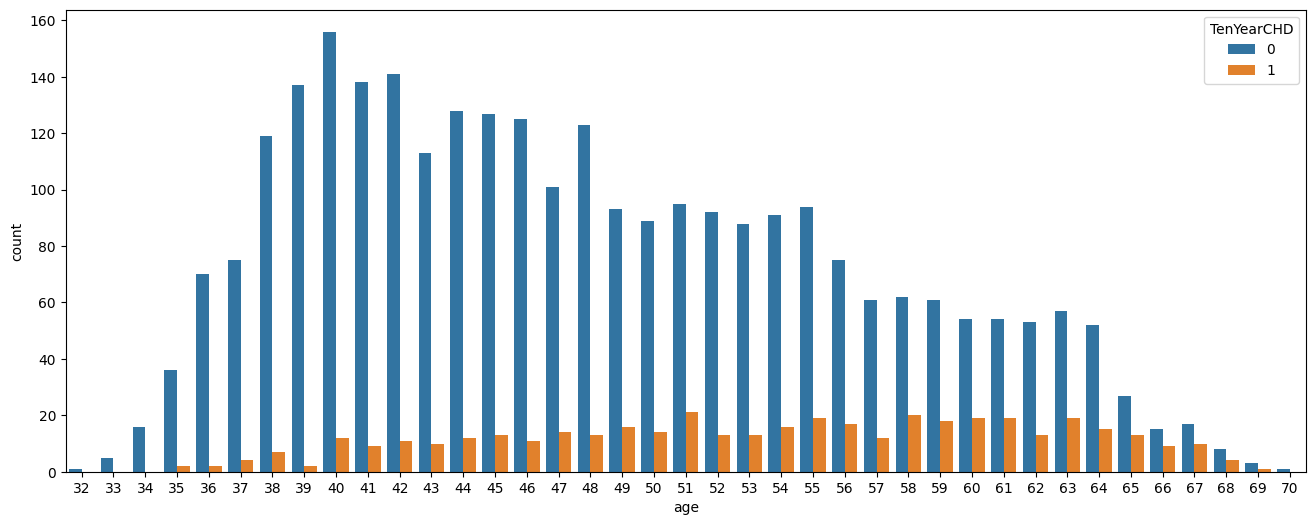

In [48]:
plt.figure(figsize=(16,6))
sns.countplot(x=Cleandf['age'],hue=Cleandf['TenYearCHD'])

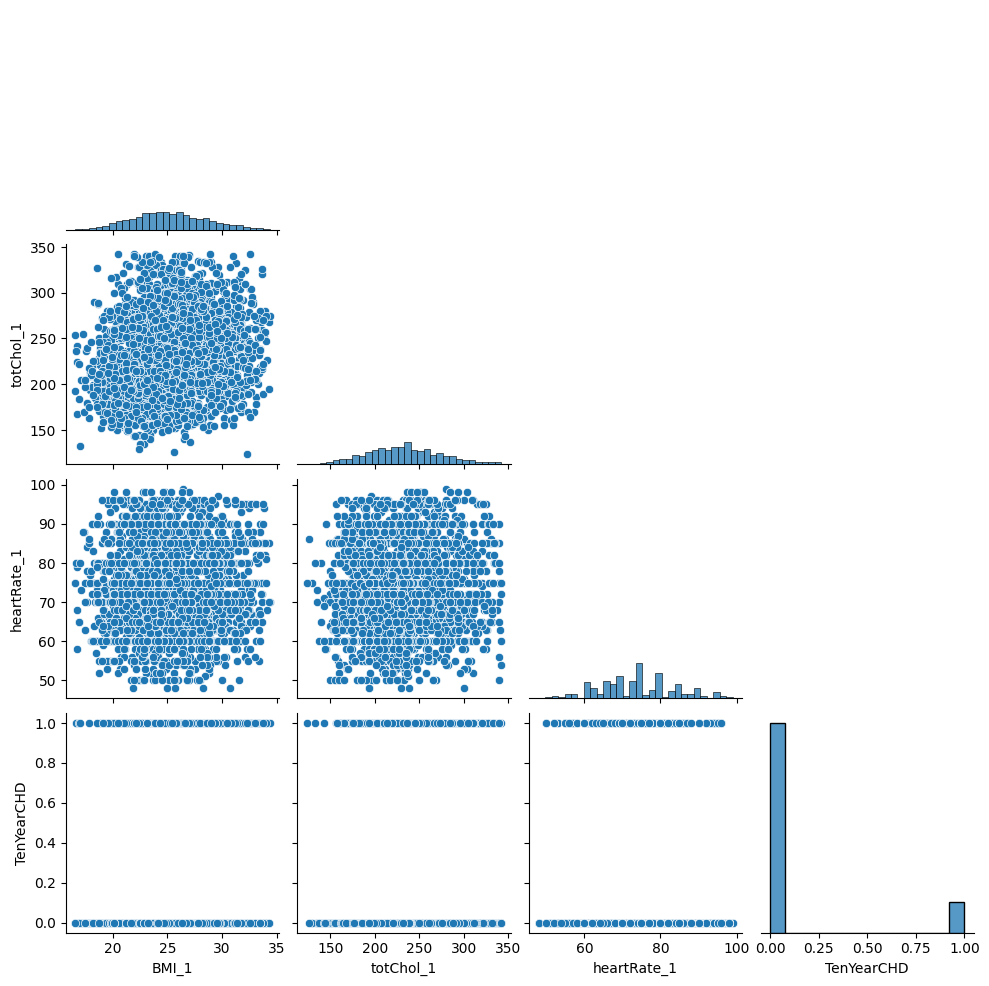

In [49]:
num_col = ['BMI_1','totChol_1','heartRate_1','TenYearCHD']
sns.pairplot(Cleandf[num_col],corner=True)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = Cleandf.drop(['TenYearCHD','currentSmoker','heartRate_1','newGlucose_1','diabetes','totChol_1','BMI_1','education_1'],axis=1)
y = Cleandf['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=50)

X_train.shape, X_test.shape

((2620, 8), (656, 8))

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        
def threshold_adjust_score(clf, X_train, y_train, X_test, y_test, threshold = 0.5):
    print(f'Threshold value : {threshold}'.center(50,'-'))
    train_outcome = clf.predict_proba(X_train)
    train_pred = train_outcome[:,1]
    for i in range(0,len(train_pred)):
        if train_pred[i] > threshold:
            train_pred[i] = 1
        else:
            train_pred[i] = 0
    clf_report = pd.DataFrame(classification_report(y_train, train_pred, output_dict=True))
    print("Train Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_train, train_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, train_pred)}\n")
        
    test_outcome = clf.predict_proba(X_test)
    test_pred = test_outcome[:,1]
    for i in range(0,len(test_pred)):
        if test_pred[i] > threshold:
            test_pred[i] = 1
        else:
            test_pred[i] = 0
    clf_report = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True))
    print("Test Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

In [52]:
scaled_data = MinMaxScaler().fit_transform(Cleandf)
scaled_df = pd.DataFrame(scaled_data,columns = Cleandf.columns)
scaled_df

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
0,0.0,0.000000,1.0,0.0,0.0,0.0,0.308989,0.291262,0.0,0.541284,0.30,0.745639,0.627451,0.333333,0.0,0.861111
1,0.0,0.026316,0.0,0.0,0.0,0.0,0.275281,0.233010,0.0,0.155963,0.00,0.182893,0.745098,0.000000,0.0,0.333333
2,0.0,0.026316,1.0,0.0,0.0,0.0,0.365169,0.504854,0.0,0.344037,0.30,0.282499,0.529412,0.666667,0.0,1.000000
3,0.0,0.026316,1.0,0.0,0.0,0.0,0.398876,0.368932,0.0,0.348624,0.10,0.405740,0.529412,0.333333,0.0,0.472222
4,0.0,0.052632,0.0,0.0,0.0,0.0,0.207865,0.252427,0.0,0.472477,0.00,0.471019,0.627451,0.666667,0.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,1.0,0.947368,1.0,0.0,0.0,0.0,0.286517,0.349515,0.0,0.577982,0.20,0.455262,0.470588,0.333333,0.0,0.250000
3272,1.0,0.947368,1.0,0.0,0.0,0.0,0.432584,0.291262,0.0,0.628440,0.20,0.550366,0.941176,0.000000,0.0,0.083333
3273,1.0,0.947368,1.0,0.0,0.0,0.0,0.691011,0.233010,1.0,0.316514,0.30,0.368036,0.529412,0.000000,0.0,0.416667
3274,1.0,0.973684,1.0,0.0,0.0,0.0,0.443820,0.427184,1.0,0.555046,0.02,0.562183,0.431373,0.000000,0.0,0.666667


In [53]:
scaled_df.describe()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.439255,0.442862,0.503053,0.004579,0.235348,0.004579,0.491614,0.499425,0.129121,0.500552,0.181405,0.486566,0.506745,0.342211,0.018659,0.554356
std,0.496372,0.222454,0.500067,0.067522,0.424281,0.067522,0.184618,0.189176,0.335385,0.183048,0.231665,0.188427,0.197503,0.338470,0.134099,0.221580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.353933,0.359223,0.000000,0.371560,0.000000,0.355093,0.372549,0.000000,0.000000,0.416667
50%,0.000000,0.421053,1.000000,0.000000,0.000000,0.000000,0.466292,0.485437,0.000000,0.495413,0.020000,0.478334,0.529412,0.333333,0.000000,0.583333
75%,1.000000,0.605263,1.000000,0.000000,0.000000,0.000000,0.612360,0.621359,0.000000,0.623853,0.400000,0.613393,0.627451,0.666667,0.000000,0.694444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
import sklearn, sys
print(sklearn.__version__, np.__version__, sys.version_info)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

bm_train_predict = logreg.predict(X_train)
bm_test_predict = logreg.predict(X_test)

print_score(logreg,X_train,y_train,X_test,y_test,train=True)
print_score(logreg,X_train,y_train,X_test,y_test,train=False)

1.2.2 1.22.4 sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)
Train Result:
Accuracy Score: 87.33%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.875000    0.500000  0.873282     0.687500      0.827481
recall        0.997378    0.018072  0.873282     0.507725      0.873282
f1-score      0.932190    0.034884  0.873282     0.483537      0.818485
support    2288.000000  332.000000  0.873282  2620.000000   2620.000000
_______________________________________________
Confusion Matrix: 
 [[2282    6]
 [ 326    6]]

Test Result:
Accuracy Score: 86.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864823   0.600000  0.862805    0.732412      0.828087
recall       0.996460   0.032967  0.862805    0.514714      0.862805
f1-score     0.925987   0.062500

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
adjusted = threshold_adjust_score(logreg,X_train,y_train,X_test,y_test,threshold=0.15)

--------------Threshold value : 0.15--------------
Train Result:
Accuracy Score: 72.67%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.925325    0.251295  0.726718     0.588310      0.839913
recall        0.747378    0.584337  0.726718     0.665857      0.726718
f1-score      0.826886    0.351449  0.726718     0.589168      0.766640
support    2288.000000  332.000000  0.726718  2620.000000   2620.000000
_______________________________________________
Confusion Matrix: 
 [[1710  578]
 [ 138  194]]

Test Result:
Accuracy Score: 72.10%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.920705   0.272277  0.721037    0.596491      0.830755
recall       0.739823   0.604396  0.721037    0.672109      0.721037
f1-score     0.820412   0.375427  0.721037    0.597919      0.758684
su

In [59]:
import statsmodels.api as sm

X = Cleandf.drop('TenYearCHD', axis=1)
y = Cleandf['TenYearCHD']

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.347767
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3276
Model:                          Logit   Df Residuals:                     3260
Method:                           MLE   Df Model:                           15
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.09603
Time:                        19:31:27   Log-Likelihood:                -1139.3
converged:                       True   LL-Null:                       -1260.3
Covariance Type:            nonrobust   LLR p-value:                 5.326e-43
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.8993      1.028     -7.686      0.000      -9.914      -5.885
male          

In [65]:
X = Cleandf.drop(['TenYearCHD','currentSmoker','heartRate_1','newGlucose_1','diabetes','totChol_1','BMI_1','education_1','prevalentHyp','diaBP'], axis=1)
y = Cleandf['TenYearCHD']

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.348131
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3276
Model:                          Logit   Df Residuals:                     3269
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.09509
Time:                        19:38:19   Log-Likelihood:                -1140.5
converged:                       True   LL-Null:                       -1260.3
Covariance Type:            nonrobust   LLR p-value:                 6.571e-49
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3596      0.516    -16.203      0.000      -9.371      -7.348
male          

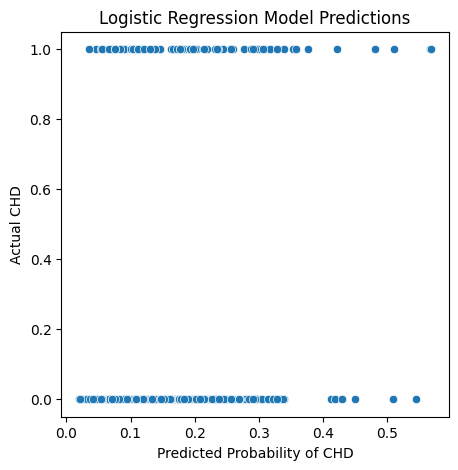

In [66]:
model = LogisticRegression()
model.fit(X, y)

# Generate predicted probabilities
y_prob = logreg.predict_proba(X_test)[:, 1]

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_prob, y=y_test)
plt.xlabel('Predicted Probability of CHD')
plt.ylabel('Actual CHD')
plt.title('Logistic Regression Model Predictions')
plt.show()